In [2]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("Task 3 and 4_Loan_Data.csv",sep=",",index_col=0)
data

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...
3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
6694516,2,3088.223727,4813.090925,38192.67591,5,596,0


In [108]:
# Data inspection and preprocessing

# Counting the number of defaults to check if the dataset is balanced 
default_rate = data['default'].sum()/data['default'].count()
print('Default rate is: {}'.format(default_rate))

# Features engineering
data["debt_to_income"] = data["total_debt_outstanding"]/data["income"]
data

Default rate is: 0.1851


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_to_income
customer_id,,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435
...,...,...,...,...,...,...,...,...
3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,0.059818
6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,0.068253
6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,0.126021


In [97]:
# Defining dep and indep variables
X = data.drop('default', axis=1)
y = data['default']

# Preprocessing and dataset split for training and testing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Best Hyperparameters for Random Forest: {'model__n_estimators': 366}
Balanced accuracy for Random Forest: 0.8196666666666667
Best Hyperparameters for Logistic Regression: {'model__C': 10}
Balanced accuracy for Logistic Regression: 0.8196666666666667
Best Hyperparameters for KNN: {'model__n_neighbors': 3}
Balanced accuracy for KNN: 0.8196666666666667
Best Hyperparameters for SVM: {'model__C': 10}
Balanced accuracy for SVM: 0.8196666666666667


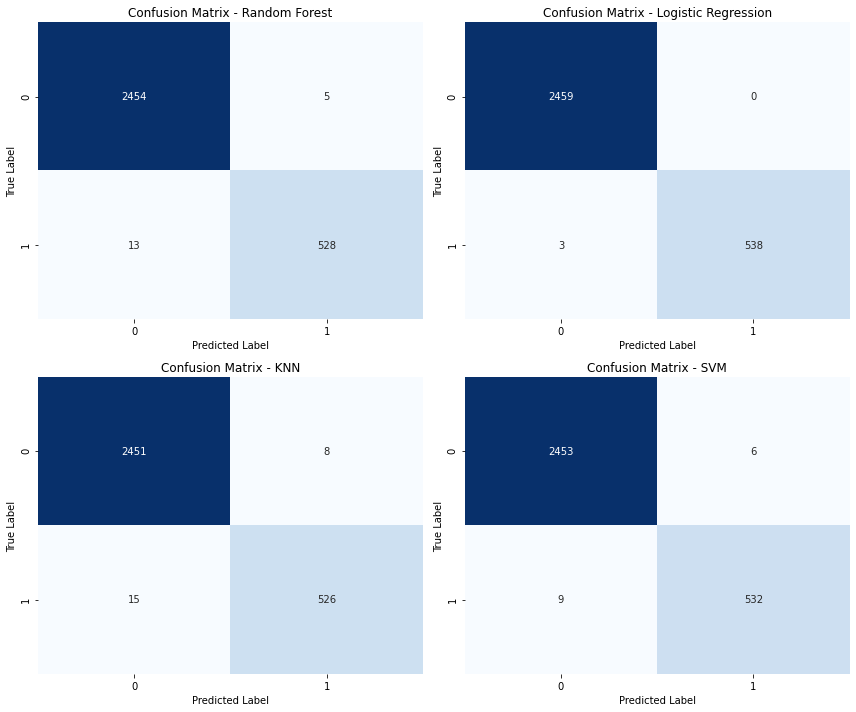

In [112]:
# Define models with hyperparameters for grid search

# PS: I have been checking that best hyperparameters were not corner solutions
models = [
    ('Random Forest', RandomForestClassifier(), {'model__n_estimators':np.linspace(100,500,num=4,dtype=int)}),
    ('Logistic Regression', LogisticRegression(), {'model__C': [0.1, 1, 10, 15]}),
    ('KNN', KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7]}),
    ('SVM', SVC(probability=True), {'model__C': [0.1, 1, 10, 15]})  # SVM with probability=True for predict_proba
]

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


# Evaluate different models using Grid Search and compare their performance

trained_models = []

for (name, model, param_grid), ax in zip(models, axes.flatten()):
    # Create a pipeline with imputation, scaling, and the current model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Using a balanced accuracy score as the dataset is unbalanced
    balanced_scorer = make_scorer(balanced_accuracy_score)
    
    # Perform grid search
    clf = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=balanced_scorer)
    clf.fit(X_train, y_train)
    
    # Evaluate the best model on the test set
    balanced_accuracy = best_model.score(X_test, y_test)
    
    # Store the trained model
    trained_models.append((name, clf.best_estimator_))

    # Predictions
    y_pred = clf.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    # Print best hyperparameters and balanced accuracy from grid search
    print(f'Best Hyperparameters for {name}: {clf.best_params_}')
    print(f'Balanced accuracy for {name}: {balanced_accuracy}')
    

# Adjust layout
plt.tight_layout()
plt.show()    

In [113]:
def predict_pd_lgd(credit_data, trained_models):
    """
    Predicts the probability of default using trained models.
    
    Args:
        credit_data (pd.DataFrame): Input credit data for prediction.
        trained_models (list): List of tuples containing (model_name, trained_model).
        
    Returns:
        pd.DataFrame: DataFrame containing model names as columns and corresponding PD and LGD as rows.
    """
    
    predictions = []
    
    # Extract relevant features from credit_data
    credit_data["debt_to_income"] = credit_data["total_debt_outstanding"]/credit_data["income"]

    
    # Predict probabilities of default using each trained model
    for model_name, model in trained_models:
        
        # Preprocess input data (imputation and scaling)
        credit_data_processed = pd.DataFrame(imputer.transform(credit_data), columns=credit_data.columns)
        credit_data_processed = pd.DataFrame(scaler.transform(credit_data_processed), columns=credit_data.columns)
        
        # Predict probability of default using the current model
        predicted_probabilities = model.predict_proba(credit_data_processed)[:, 1]
        
        # Calculate loss given default
        recovery_rate = 0.1  # Recovery rate (10%)
        predicted_lgd = credit_data['loan_amt_outstanding'].values * predicted_probabilities * (1 - recovery_rate)
        
        # Add PD and LGD to the predictions list
        predictions.append((predicted_probabilities, predicted_lgd))
    
    # Create a DataFrame from the predictions list
    predictions_df = pd.DataFrame(predictions).T
    predictions_df.columns = [model_name for model_name, _ in trained_models]  
    predictions_df.index = ["Estimated PD", "Estimated LGD"]
    
    return predictions_df


In [118]:
# Inpunting new parameters to check the function
new_input = {
    'credit_lines_outstanding': 1,
    'loan_amt_outstanding': 5000,
    'total_debt_outstanding': 12000,
    'income':51300,
    'years_employed':13,
    'fico_score':572,
}

# Create an empty DataFrame with the same columns
new_df = pd.DataFrame(columns=data.columns.drop(['debt_to_income','default']))  
# Iterate through columns and update values from user_input
for column in new_df.columns:
    if column in new_input:
        new_df[column] = [new_input[column]]  # Assign user's input value to the corresponding column
    else:
        # If the column is not in user's input, default None 
        new_df[column] = [None]  

new_df


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,1,5000,12000,51300,13,572


In [119]:
predict_pd_lgd(new_df, trained_models = trained_models)

,Random Forest,Logistic Regression,KNN,SVM
Estimated PD,[0.5846994535519126],[1.0],[1.0],[0.5331363706602188]
Estimated LGD,[2631.1475409836066],[4500.0],[4500.0],[2399.113667970985]
